In [152]:
#add dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats



In [153]:
#create engine
from sqlalchemy import create_engine
engine = create_engine('postgresql://emmalimoli@localhost:5432/sql-challenge')
connection = engine.connect()

In [154]:
#read sql
employees_data = pd.read_sql("SELECT * FROM employees_data", connection)
titles = pd.read_sql("SELECT * FROM titles", connection)
salaries = pd.read_sql("SELECT * FROM salaries", connection)

In [155]:
#check salaries
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [156]:
#check employees
employees_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [157]:
#rename employees to change title_id to merge
rename_employees = employees_data.rename(columns={"emp_title_id":"title_id"})
rename_employees

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [158]:
#check titles
titles.head(10)

,title_id,title,id
0,s0001,Staff,1
1,s0002,Senior Staff,2
2,e0001,Assistant Engineer,3
3,e0002,Engineer,4
4,e0003,Senior Engineer,5
5,e0004,Technique Leader,6
6,m0001,Manager,7


In [159]:
#merge salaries and renamed_employees

combined_data = pd.merge(salaries, rename_employees, how='outer', on='emp_no')
combined_data.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [160]:
#merge titles and combined_data
all_data = pd.merge(combined_data, titles, how='outer', on='title_id')
all_data.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title,id
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,5
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,5
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,5
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,5
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer,5


In [161]:
#find the min and max of the salaries

print(salaries["salary"].min())
print(salaries["salary"].max())

40000
129492


In [162]:
#create bins and labels for salary ranges

bins = [0, 45000, 65000, 85000, 105000, 125000, 145000 ]

labels = ["0 to 45k", "46k to 66k", "67k to 87", "88k to 108k", "109k to 129k", "130k to 150k"]

In [163]:
#do pd.cut to run bins
pd.cut(salaries["salary"], bins, labels=labels).head()

0    46k to 66k
1     67k to 87
2      0 to 45k
3      0 to 45k
4     67k to 87
Name: salary, dtype: category
Categories (6, object): [0 to 45k < 46k to 66k < 67k to 87 < 88k to 108k < 109k to 129k < 130k to 150k]

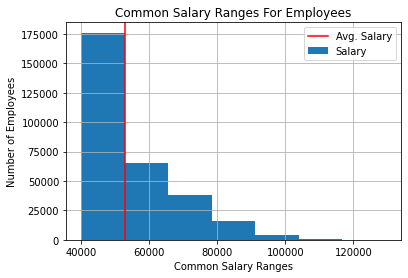

In [164]:
#create a histogram to visualize the most common salary ranges for employees

hist_chart = salaries.plot=salaries["salary"].hist(bins=7, label="Salary")
plt.axvline(salaries["salary"].mean(), color='r', linestyle='solid', linewidth=1.5, label="Avg. Salary")

plt.title("Common Salary Ranges For Employees")
plt.xlabel("Common Salary Ranges")
plt.ylabel("Number of Employees")
plt.legend()

plt.savefig("ERD_image/histograph.png")
hist_chart

In [165]:
#groupby title_id

title_groups = all_data.groupby("title_id")
title_groups.count()


,emp_no,salary,birth_date,first_name,last_name,sex,hire_date,title,id
title_id,,,,,,,,,
e0001,5835,5835,5835,5835,5835,5835,5835,5835,5835
e0002,47303,47303,47303,47303,47303,47303,47303,47303,47303
e0003,97747,97747,97747,97747,97747,97747,97747,97747,97747
e0004,15148,15148,15148,15148,15148,15148,15148,15148,15148
m0001,24,24,24,24,24,24,24,24,24
s0001,107384,107384,107384,107384,107384,107384,107384,107384,107384
s0002,26583,26583,26583,26583,26583,26583,26583,26583,26583


In [166]:
#find the mean of the salaries by title
average = title_groups["salary"].mean()
average

title_id
e0001    48564.434447
e0002    48535.336511
e0003    48506.799871
e0004    48582.896092
m0001    51531.041667
s0001    58465.382850
s0002    58550.172704
Name: salary, dtype: float64

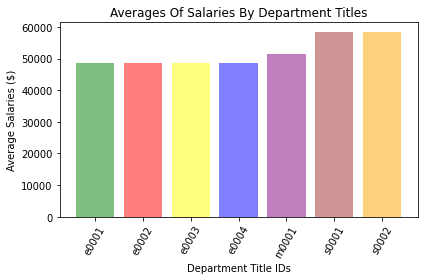

In [167]:
#create a bar chart of average salary by title
#avg salary by title

titles = average.index
avg_salaries = average.values

x_axis = np.arange(len(titles))
tick_locations = [value for value in x_axis]
bar = plt.bar(x_axis, avg_salaries, alpha=0.5, align="center", color=('green', 'red', 'yellow', 'blue', 'purple', 'brown', 'orange'))
plt.xticks(tick_locations, titles, rotation=60)

plt.title("Averages Of Salaries By Department Titles")
plt.xlabel("Department Title IDs")
plt.ylabel("Average Salaries ($)")

plt.tight_layout()
plt.savefig("ERD_image/bargraph.png")
plt.show()